In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

In [4]:
df1 = pd.DataFrame({'node':['Terry','Carle','McClymonds','1','2','3'],
                                     'demand':[-1,-1,-1,1,1,1]})
df1

,node,demand
0,Terry,-1
1,Carle,-1
2,McClymonds,-1
3,1,1
4,2,1
5,3,1


In [5]:
df2 = pd.DataFrame({
    'source':['Terry','Carle','McClymonds','Terry','Carle','McClymonds','Terry','Carle','McClymonds'],
    'destination':['1','1','1','2','2','2','3','3','3'],
    'cost':[10,9,6,15,18,14,9,5,3]})
#pd.merge(left=df2,right=df1,how='left',left_on='source',right_on='source_node')
df2

,source,destination,cost
0,Terry,1,10
1,Carle,1,9
2,McClymonds,1,6
3,Terry,2,15
4,Carle,2,18
5,McClymonds,2,14
6,Terry,3,9
7,Carle,3,5
8,McClymonds,3,3


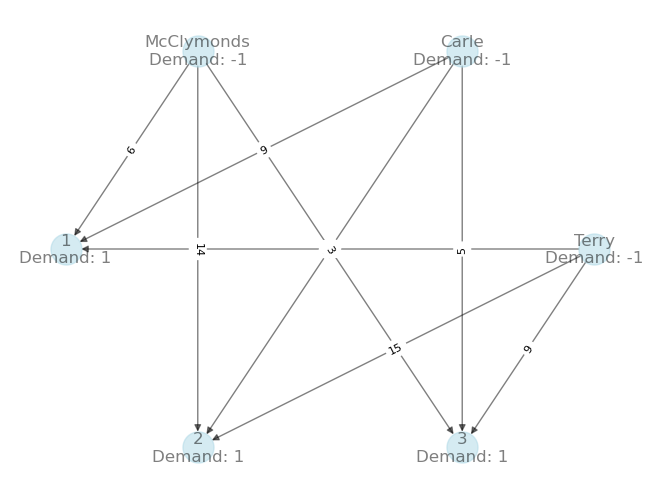

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# Create a directed graph (DiGraph)
G = nx.DiGraph()

# Add nodes with demand as node attribute
for _, row in df1.iterrows():
    G.add_node(row['node'], demand=row['demand'])

# Add edges with weights (costs)
for _, row in df2.iterrows():
    G.add_edge(row['source'], row['destination'], weight=row['cost'])

# Create a layout for the nodes
pos = nx.circular_layout(G)

# Draw the nodes with labels (including demand values)
node_labels = {node: f"{node}\nDemand: {G.nodes[node]['demand']}" for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color='lightblue',alpha=0.5)

# Draw the edges with weights as labels
edge_labels = {(edge[0], edge[1]): G[edge[0]][edge[1]]['weight'] for edge in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the graph
plt.show()

In [7]:
G = nx.DiGraph()
# Add nodes with demands
for _, row in df1.iterrows():
    
    G.add_node(row['node'], demand=row['demand'])

# Add edges with weights (costs)
for _, row in df2.iterrows():
    G.add_edge(row['source'], row['destination'], weight=row['cost'])
flowCost,flowDict = nx.network_simplex(G)
print(flowDict)
print(flowCost)

{'Terry': {'1': 0, '2': 1, '3': 0}, 'Carle': {'1': 0, '2': 0, '3': 1}, 'McClymonds': {'1': 1, '2': 0, '3': 0}, '1': {}, '2': {}, '3': {}}
26


In [8]:
import pandas as pd

# Convert the flowDict dictionary to a DataFrame
df = pd.DataFrame.from_dict(flowDict, orient='index').fillna(0)

# Reset the index to have 'source' as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'source'}, inplace=True)

# Melt the DataFrame to have 'source', 'destination', and 'flow' columns
df_melted = pd.melt(df, id_vars='source', var_name='destination', value_name='flow')
df_melted=df_melted[df_melted['flow']!=0]
df_melted=pd.merge(left=df_melted,right=df2,how='inner',on=['source','destination'])
df_melted['TotCost']=df_melted['flow']*df_melted['cost']
df_melted

,source,destination,flow,cost,TotCost
0,McClymonds,1,1,6,6
1,Terry,2,1,15,15
2,Carle,3,1,5,5


In [9]:
df_melted['TotCost'].sum()

26

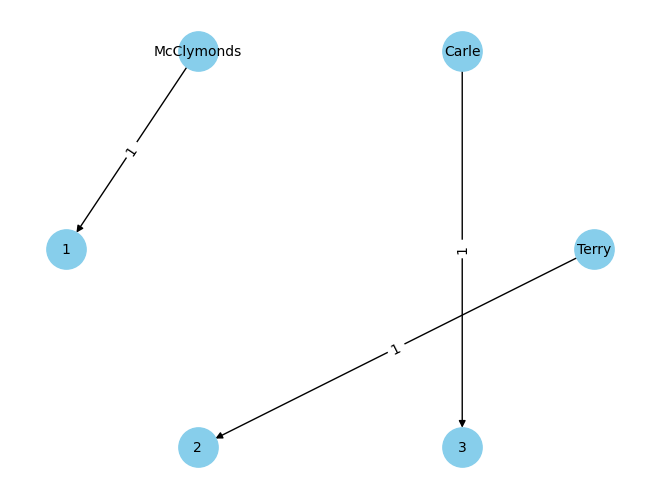

In [10]:
# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
nodes = flowDict.keys()
G.add_nodes_from(nodes)

# Add edges with non-zero values
for source, destinations in flowDict.items():
    for destination, value in destinations.items():
        if value != 0:
            G.add_edge(source, destination, weight=value)

# Draw the graph
pos = nx.circular_layout(G)  # You can choose a different layout if you prefer
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}

nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()